In [13]:
%cd ..

/Users/tantri/Documents/My Research Material/UTSSpring23/AdvancedML/AT1/AT1-NBAComp


In [ ]:
#All the data processing steps have been documented in the data_preprocessing.ipynb notebook in the notebook folder. 

In [ ]:
#For Data Preprocessing, please run the below cell. 

In [ ]:
!make data

In [21]:
# Read the preprocessed data
X_train = pd.read_csv('data/processed/X_train.csv')
X_val = pd.read_csv('data/processed/X_val.csv')
X_test = pd.read_csv('data/processed/X_test.csv')
y_train_resampled = pd.read_csv('data/processed/y_train.csv').iloc[:, 0]  # Convert to Series
y_val_resampled = pd.read_csv('data/processed/y_val.csv').iloc[:, 0]      # Convert to Series
y_test  = pd.read_csv('data/processed/y_test.csv' )

In [19]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define a range of hyperparameters to search over
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a LogisticRegression model with regularization
model = LogisticRegression(max_iter=1000, penalty='l2')

# Use GridSearchCV to find the best hyperparameters using cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_resampled)

# Get the best model with the selected hyperparameters
lr_best_model = grid_search.best_estimator_

# Train the best model on the entire training data
lr_best_model.fit(X_train, y_train_resampled)

# Evaluate the model on the validation set
validation_accuracy = lr_best_model.score(X_val, y_val_resampled)
print("Validation Accuracy:", validation_accuracy)
# Evaluate the model on the test set
test_accuracy = lr_best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.9626147201727551
Test Accuracy: 0.9613758992805755


In [22]:
#By taking the above coefficient value for each feature, we are going to try use the same features with a more robust model, XGBoost. 

coefficients = pd.DataFrame({
    'Feature': ['adrtg', 'Min_per', 'AST_per', 'twoPM', 'obpm', 'twoPA', 'stl_per', 'dunksmiss_dunksmade', 'ast',
                'usg', 'midmade_midmiss', 'TS_per', 'adjoe', 'rimmade', 'midmade', 'porpag', 'drtg', 'dgbpm',
                'dunksmade', 'stops', 'ogbpm', 'eFG', 'dbpm', 'TO_per', 'pfr', 'mp', 'rimmade_rimmiss', 'TPM',
                'dunks_ratio', 'GP', 'bpm', 'Rec_Rank', 'twoP_per', 'FT_per', 'FTA', 'mid_ratio', 'dreb', 'DRB_per',
                'dporpag', 'blk_per', 'gbpm', 'stl', 'oreb', 'ast_tov', 'FTM', 'ftr', 'rim_ratio', 'blk', 'treb',
                'TPA', 'TP_per', 'pick', 'ORB_per', 'pts', 'Ortg'],
    'Absolute Coefficient': [3.340078, 3.542694, 2.779246, 2.558382, 2.441382, 2.395607, 2.205659, 2.131396,
                             2.092174, 2.086758, 2.043614, 1.923499, 1.795148, 1.754931, 1.675424, 1.623246,
                             1.584561, 1.505753, 1.505267, 1.457823, 1.264243, 1.249943, 1.243752, 1.079634,
                             1.048334, 0.984514, 0.927019, 0.904347, 0.875047, 0.861829, 0.839320, 0.789912,
                             0.597381, 0.575458, 0.528011, 0.525412, 0.498164, 0.436940, 0.426927, 0.421211,
                             0.377454, 0.369609, 0.337747, 0.287269, 0.248238, 0.246318, 0.204145, 0.192189,
                             0.168635, 0.151730, 0.151492, 0.139234, 0.088484, 0.086800, 0.042992]
})


In [23]:

import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Set a threshold for absolute coefficient values
threshold = 0.04

# Select features with absolute coefficient values above the threshold
selected_features = coefficients[coefficients['Absolute Coefficient'] > threshold]['Feature'].tolist()

# Create DataFrames with selected features
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

# Initialize XGBoost model
xgb_model = XGBClassifier()

# Train the model on the training data
xgb_model.fit(X_train_selected, y_train_resampled)

# Predict on validation set
val_predictions = xgb_model.predict(X_val_selected)
val_accuracy = accuracy_score(y_val_resampled, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Predict on test set
test_predictions = xgb_model.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.9799352168436206
Test Accuracy: 0.9829586330935252


In [323]:
#Since the results are slightly better, we are going to try and do hyperparameter tuning using grid search to get the best parameters. 

import pandas as pd
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

coefficients = pd.DataFrame({
    'Feature': ['adrtg', 'Min_per', 'AST_per', 'twoPM', 'obpm', 'twoPA', 'stl_per', 'dunksmiss_dunksmade', 'ast',
                'usg', 'midmade_midmiss', 'TS_per', 'adjoe', 'rimmade', 'midmade', 'porpag', 'drtg', 'dgbpm',
                'dunksmade', 'stops', 'ogbpm', 'eFG', 'dbpm', 'TO_per', 'pfr', 'mp', 'rimmade_rimmiss', 'TPM',
                'dunks_ratio', 'GP', 'bpm', 'Rec_Rank', 'twoP_per', 'FT_per', 'FTA', 'mid_ratio', 'dreb', 'DRB_per',
                'dporpag', 'blk_per', 'gbpm', 'stl', 'oreb', 'ast_tov', 'FTM', 'ftr', 'rim_ratio', 'blk', 'treb',
                'TPA', 'TP_per', 'pick', 'ORB_per', 'pts', 'Ortg'],
    'Absolute Coefficient': [3.340078, 3.542694, 2.779246, 2.558382, 2.441382, 2.395607, 2.205659, 2.131396,
                             2.092174, 2.086758, 2.043614, 1.923499, 1.795148, 1.754931, 1.675424, 1.623246,
                             1.584561, 1.505753, 1.505267, 1.457823, 1.264243, 1.249943, 1.243752, 1.079634,
                             1.048334, 0.984514, 0.927019, 0.904347, 0.875047, 0.861829, 0.839320, 0.789912,
                             0.597381, 0.575458, 0.528011, 0.525412, 0.498164, 0.436940, 0.426927, 0.421211,
                             0.377454, 0.369609, 0.337747, 0.287269, 0.248238, 0.246318, 0.204145, 0.192189,
                             0.168635, 0.151730, 0.151492, 0.139234, 0.088484, 0.086800, 0.042992]
})

# Set a threshold for absolute coefficient values
threshold = 0.04

# Select features with absolute coefficient values above the threshold
selected_features = coefficients[coefficients['Absolute Coefficient'] > threshold]['Feature'].tolist()

# Create DataFrames with selected features
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

# Create XGBoost model
xgb_model_grid = XGBClassifier()

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'reg_lambda': [0.1, 1, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model_grid, param_grid=param_grid, scoring='accuracy', cv=3)

# Perform grid search on training data
grid_search.fit(X_train_selected, y_train_resampled)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_grid_model = grid_search.best_estimator_

# Evaluate the best model on validation set
val_predictions = best_grid_model.predict(X_val_selected)
val_accuracy = accuracy_score(y_val_resampled, val_predictions)
val_f1 = f1_score(y_val_resampled, val_predictions)
print("Best Validation Accuracy:", val_accuracy)
print("Best Validation F1 Score:", val_f1)

# Predict on test set
test_predictions = best_grid_model.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)
print("Test F1 Score:", test_f1)


Best Validation Accuracy: 0.9814198308439805
Best Validation F1 Score: 0.9811990713342742
Test Accuracy: 0.9857014388489208
Test F1 Score: 0.9855729970057163


In [324]:
# These may not be the best hyper parameters, but we are going to try and see the parameters closer to these values to improve the model performance and generalisation capability. 
print(best_params)


{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 300, 'reg_lambda': 0.1}


In [325]:

import pandas as pd
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# Set a threshold for absolute coefficient values
threshold = 0.04

# Select features with absolute coefficient values above the threshold
selected_features = coefficients[coefficients['Absolute Coefficient'] > threshold]['Feature'].tolist()

# Create DataFrames with selected features
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

# Create XGBoost model
xgb_model_grid = XGBClassifier()

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'learning_rate': [0.01, 0.18, 0.2, 0.22, 0.25],
    'max_depth': [2, 4, 5, 6],
    'n_estimators': [250, 300, 310],
    'reg_lambda': [0.1, 0.15, 0.2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model_grid, param_grid=param_grid, scoring='accuracy', cv=3)

# Perform grid search on training data
grid_search.fit(X_train_selected, y_train_resampled)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_grid_model_v2 = grid_search.best_estimator_

# Evaluate the best model on validation set
val_predictions = best_grid_model_v2.predict(X_val_selected)
val_accuracy = accuracy_score(y_val_resampled, val_predictions)
val_f1 = f1_score(y_val_resampled, val_predictions)
print("Best Validation Accuracy:", val_accuracy)
print("Best Validation F1 Score:", val_f1)

# Predict on test set
test_predictions = best_grid_model_v2.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)
print("Test F1 Score:", test_f1)

Best Validation Accuracy: 0.9816897606622278
Best Validation F1 Score: 0.9814772675556365
Test Accuracy: 0.9868255395683453
Test F1 Score: 0.9867198477088337


In [60]:
#After a few tweaks in the parameters, making sure to each the optimum max-depth while increasing the value of the reg_lambda to prevent from overfitting,
# The following parameters have brought in the best model performance in terms of the F1 score, and generalisation. 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

# Use the best parameters obtained from grid search
best_params = {'learning_rate': 0.0145, 'max_depth': 2, 'n_estimators': 400, 'reg_lambda': 0.5}

# Create XGBoost model with the best parameters
best_model = XGBClassifier(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    reg_lambda=best_params['reg_lambda']
)

# Train the model on the training data with selected features
best_model.fit(X_train_selected, y_train_resampled)

# Evaluate the model on the validation set
train_predictions = best_model.predict(X_train_selected)
train_accuracy = accuracy_score(y_train_resampled, train_predictions)
train_f1 = f1_score(y_train_resampled, train_predictions)
print("Train Accuracy:", train_accuracy)
print("Train F1 Score:", train_f1)

# Evaluate the model on the validation set
val_predictions = best_model.predict(X_val_selected)
val_accuracy = accuracy_score(y_val_resampled, val_predictions)
val_f1 = f1_score(y_val_resampled, val_predictions)
print("Validation Accuracy:", val_accuracy)
print("Validation F1 Score:", val_f1)

# Evaluate the model on the test set
test_predictions = best_model.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)
print("Test F1 Score:", test_f1)

Train Accuracy: 0.9933825515440713
Train F1 Score: 0.9934215433268195
Validation Accuracy: 0.9932067662407774
Validation F1 Score: 0.9932513966480447
Test Accuracy: 0.9935701438848921
Test F1 Score: 0.9936095097644903


In [328]:
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.model_selection import cross_validate

# Use the best parameters obtained from grid search
best_params = {'learning_rate': 0.0750, 'max_depth': 1, 'n_estimators': 500, 'reg_lambda': 0.4}

# Create XGBoost model with the best parameters
best_model = XGBClassifier(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    reg_lambda=best_params['reg_lambda']
)

# Define scoring metrics
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

# Perform cross-validation
cv_results = cross_validate(
    best_model,
    X_train_selected,
    y_train_resampled,
    cv=5,  # Number of folds for cross-validation
    scoring=scoring_metrics
)

# Print cross-validation results
print("Cross-Validation Results:")
print("Accuracy:", cv_results['test_accuracy'])
print("F1 Score:", cv_results['test_f1_score'])


Cross-Validation Results:
Accuracy: [0.99467327 0.99437317 0.99459784 0.99302221 0.99392257]
F1 Score: [0.99469079 0.99440173 0.99462366 0.9930685  0.99395838]


In [50]:
from joblib import dump

dump(best_model,  'models/xgb_model_best.joblib')

['models/xgb_model_best.joblib']

Validation AUROC: 0.9979139497871277
Test AUROC: 0.9985062723202732


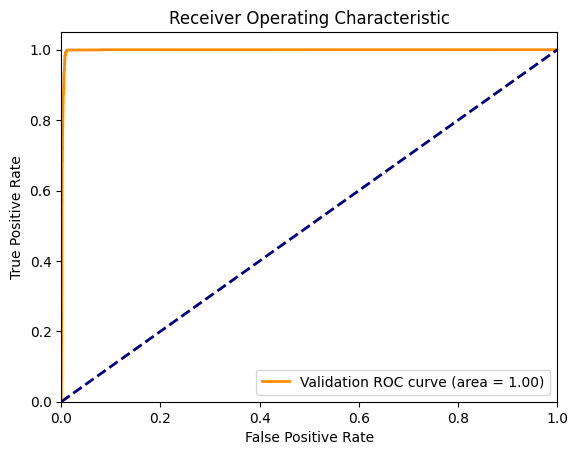

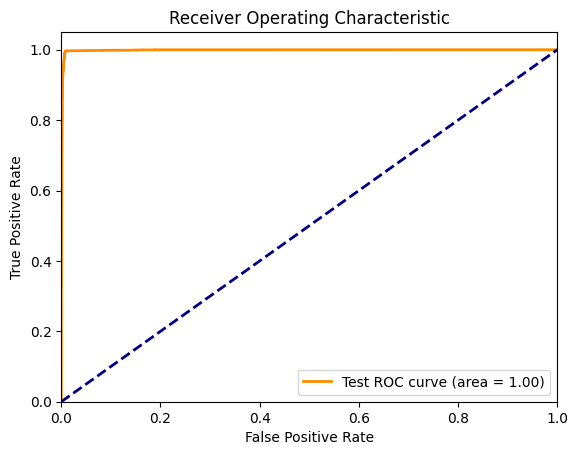

In [61]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

loaded_model = load('models/xgb_model_best.joblib')

# Now you can use the loaded model for predictions
val_probabilities = loaded_model.predict_proba(X_val_selected)[:, 1]
test_probabilities = loaded_model.predict_proba(X_test_selected)[:, 1]

# Calculate AUROC for validation set
val_auroc = roc_auc_score(y_val_resampled, val_probabilities)
print("Validation AUROC:", val_auroc)

# Calculate AUROC for test set
test_auroc = roc_auc_score(y_test, test_probabilities)
print("Test AUROC:", test_auroc)

# Plot ROC curve for validation set
fpr_val, tpr_val, _ = roc_curve(y_val_resampled, val_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='Validation ROC curve (area = %0.2f)' % val_auroc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Test ROC curve (area = %0.2f)' % test_auroc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [53]:
selected_features = [
    'GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per',
    'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per',
    'stl_per', 'ftr', 'porpag', 'adjoe', 'pfr', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss',
    'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade',
    'dunks_ratio', 'pick', 'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
    'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts'
]
test = pd.read_csv('data/raw/test.csv')
# Keeping only the selected features in the test dataframe
test_selected = test[selected_features]

In [54]:
from joblib import dump, load
loaded_scaler = load('models/scaler.joblib')
X_tt = loaded_scaler.transform(test_selected)


# Converting scaled array to DataFrame
X_tt_df = pd.DataFrame(X_tt, columns=test_selected.columns)

# Now X_tt_df is a DataFrame containing the scaled data with the appropriate column names
X_tt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GP                   4970 non-null   float64
 1   Min_per              4970 non-null   float64
 2   Ortg                 4970 non-null   float64
 3   usg                  4970 non-null   float64
 4   eFG                  4970 non-null   float64
 5   TS_per               4970 non-null   float64
 6   ORB_per              4970 non-null   float64
 7   DRB_per              4970 non-null   float64
 8   AST_per              4970 non-null   float64
 9   TO_per               4970 non-null   float64
 10  FTM                  4970 non-null   float64
 11  FTA                  4970 non-null   float64
 12  FT_per               4970 non-null   float64
 13  twoPM                4970 non-null   float64
 14  twoPA                4970 non-null   float64
 15  twoP_per             4970 non-null   f

In [55]:
import pandas as pd
import numpy as np

# Load the test data
test = pd.read_csv('data/raw/test.csv')

# Setting a threshold for absolute coefficient values
threshold = 0.04

# Selecting features with absolute coefficient values above the threshold
selected_features = coefficients[coefficients['Absolute Coefficient'] > threshold]['Feature'].tolist()


# Keeping only the selected features in the test dataframe
test_selected = X_tt_df[selected_features]



In [56]:
test_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   adrtg                4969 non-null   float64
 1   Min_per              4970 non-null   float64
 2   AST_per              4970 non-null   float64
 3   twoPM                4970 non-null   float64
 4   obpm                 4969 non-null   float64
 5   twoPA                4970 non-null   float64
 6   stl_per              4970 non-null   float64
 7   dunksmiss_dunksmade  4722 non-null   float64
 8   ast                  4970 non-null   float64
 9   usg                  4970 non-null   float64
 10  midmade_midmiss      4722 non-null   float64
 11  TS_per               4970 non-null   float64
 12  adjoe                4970 non-null   float64
 13  rimmade              4722 non-null   float64
 14  midmade              4722 non-null   float64
 15  porpag               4970 non-null   f

In [46]:
test_selected.to_csv('data/processed/final_test_set.csv', index=False)


In [47]:
import pandas as pd
from joblib import load
from sklearn.preprocessing import StandardScaler

# Load the saved model
xgb_loaded_model = load('models/xgb_model_best.joblib')







In [58]:
predicted_probabilities_xgb = xgb_loaded_model.predict_proba(test_selected_imputed)

testing = pd.read_csv('data/raw/test.csv')


xgb_result_df = pd.DataFrame({
    'player_id': testing['player_id'] ,
    'drafted_probability': predicted_probabilities_xgb[:, 1]
})

# Save the predicted probabilities to a CSV file
xgb_result_df.to_csv('data/interim/week_3_best_model_predicted_probabilities.csv', index=False)
xgb_result_df.to_csv('reports/figures/final_model_outputs_week3_31stAug.csv', index=False)